# Анализ зависимости метрик от параметров LightFM-модели

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import os
import typing
import numpy as np


os.environ['DIR'] = '/home/ml/softezza_ml'


grid_data = pd.read_csv('/home/ml/softezza_ml/lightfm_grid_report.csv')
grid_data = grid_data.sort_values(['RecallNoPop@10', 'PopInt@10', 'Recall@10', 'MAP@10'], ascending=[False, True, False, False])

grid_data.head()

,Recall@10,MAP@10,MIUF@10,Siren@10,PopInt@10,RecallNoPop@10,model,loss,max_sampled,no_components,epochs,with_feature
7,0.134157,0.060028,4.085855,0.000159,0.325782,0.064682,lightfm,warp,22,125,6,lifetime
55,0.133237,0.060117,4.149332,0.000166,0.315199,0.064254,lightfm,warp,27,125,6,lifetime
127,0.131231,0.058236,4.273753,0.000189,0.300931,0.063966,lightfm,warp,27,125,7,lifetime
23,0.131436,0.058123,4.249661,0.000187,0.307612,0.063671,lightfm,warp,22,175,6,lifetime
31,0.134345,0.060430,4.080820,0.000158,0.328111,0.063590,lightfm,warp,25,125,6,lifetime


### Корреляции

In [4]:
grid_data[['RecallNoPop@10', 'max_sampled', 'no_components', 'epochs']].corr()

,RecallNoPop@10,max_sampled,no_components,epochs
RecallNoPop@10,1.000000,-6.780712e-02,-1.118970e-01,-1.635747e-01
max_sampled,-0.067807,1.000000e+00,1.426411e-16,1.915459e-16
no_components,-0.111897,1.426411e-16,1.000000e+00,-5.801557e-17
epochs,-0.163575,1.915459e-16,-5.801557e-17,1.000000e+00


### Графики зависимости метрик от параметров LightFM-модели

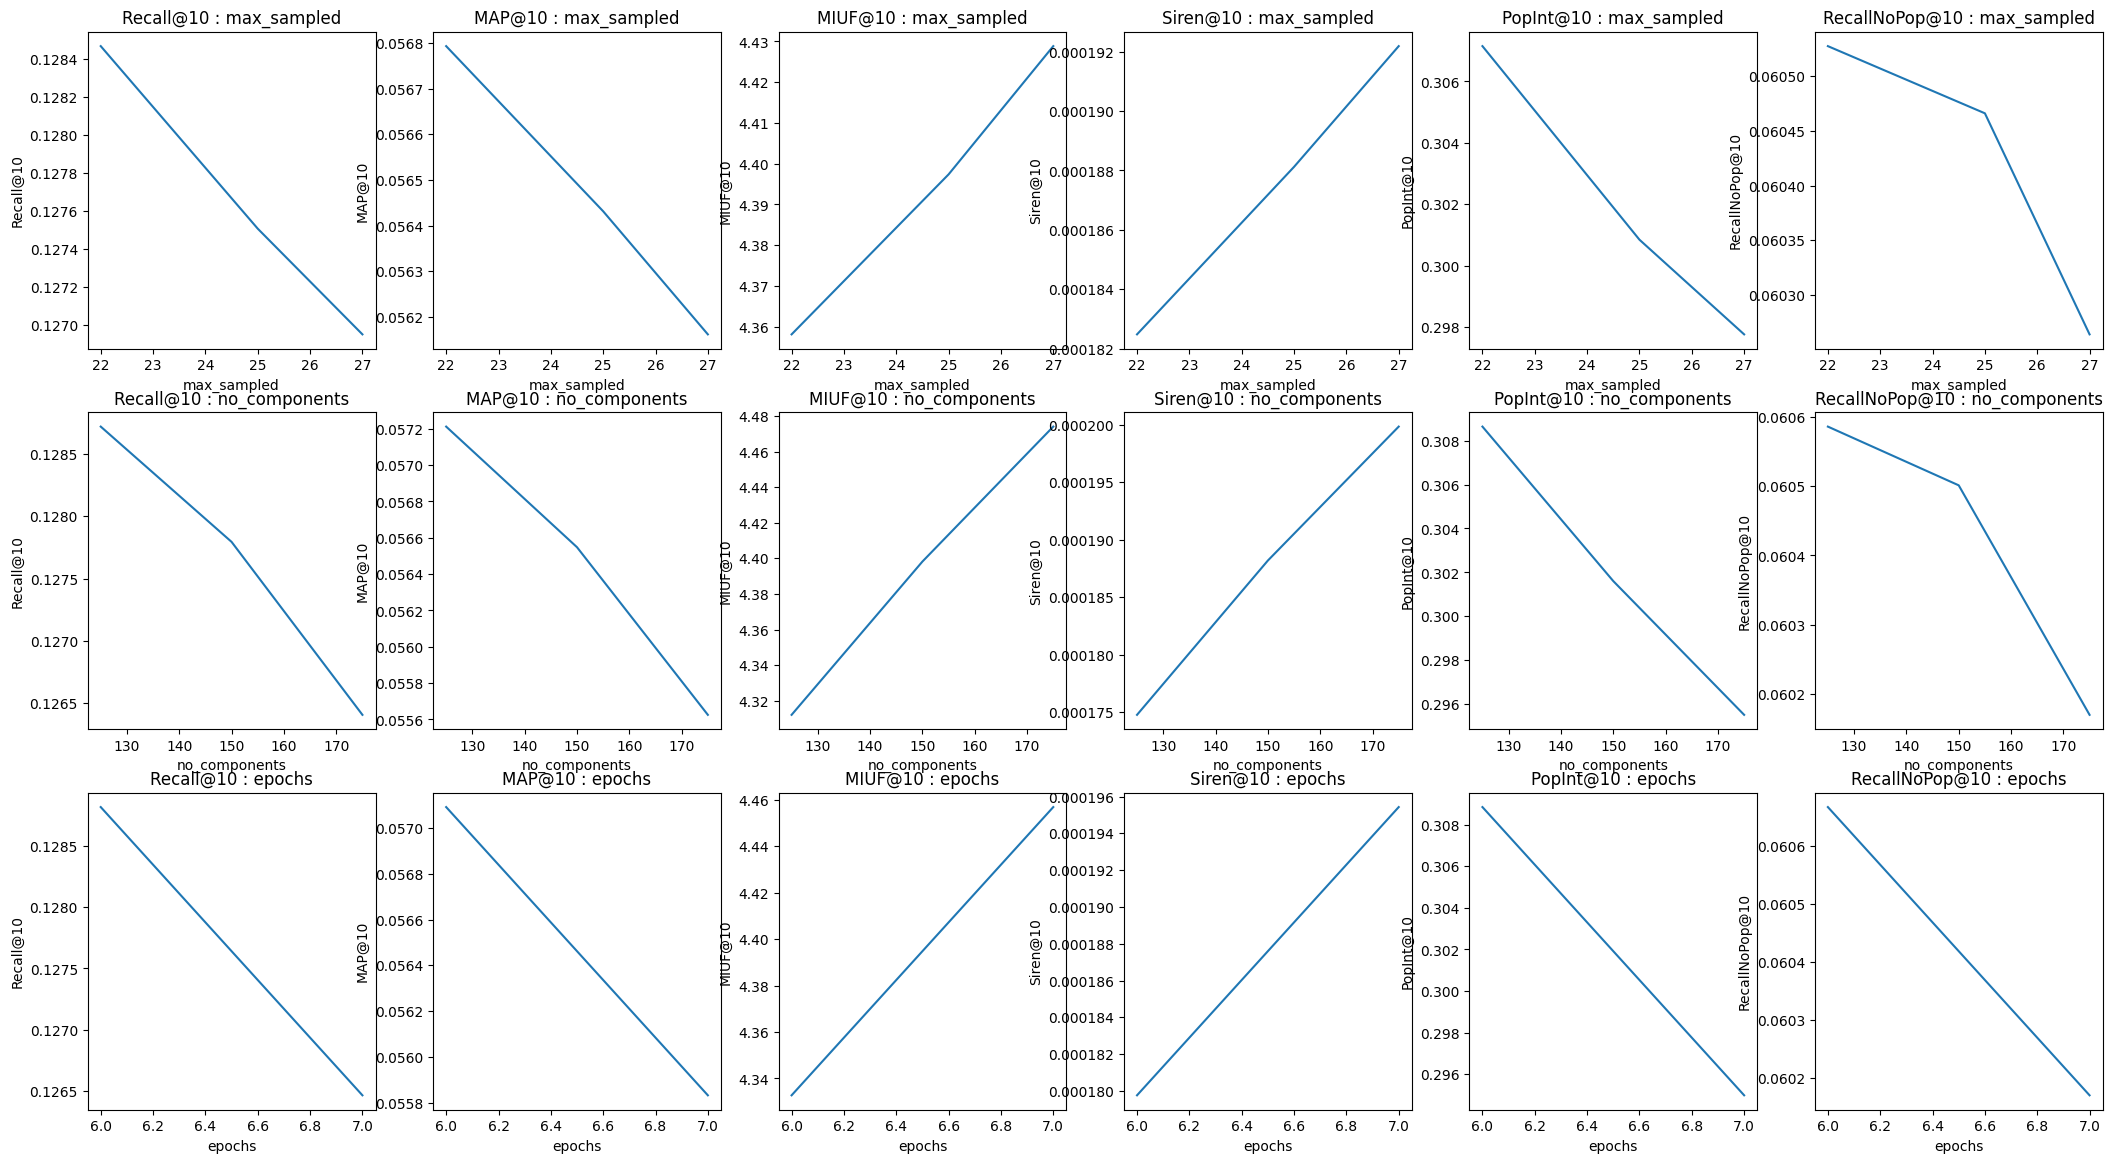

In [18]:
def get_dots(col: str, agg_func: typing.Callable = np.mean):
    return grid_data.groupby(col).apply(agg_func)

fig, axis = plt.subplots(3, 6)
fig.set_size_inches(26, 14)

for i, p in enumerate(
    ['max_sampled', 'no_components', 'epochs']
):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        dots = get_dots(p, np.mean)

        axis[i][j].set_title(f"{m} : {p}")
        axis[i][j].set_xlabel(p)
        axis[i][j].set_ylabel(m)
        axis[i][j].plot(dots.index, dots[m]);